### Time Series Analysis

#### TSA Decomposition

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

import joblib

# import bamboolib as bam

import plotly.graph_objects as go
from tkinter import *
import dtale as dt
# import glob
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing

from sklearn import metrics
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', '{:,.6}'.format)
# pd.set_option('max_columns', 100)

#? Import for plotly visualizations, too?

/home/fqp/anaconda3/envs/s1_v3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, save

from bokeh.models.tools import HoverTool
from bokeh.models import Legend, ColumnDataSource, Range1d
output_notebook()

Loading BokehJS ...

### Loading the Data

In [ ]:
# df = joblib.load("/home/fqp/Documents/0 Study/3 Projects/s5_SQL_Flask_RapidsAI/data_prio/GTMA Trades_df1A")
# df.head(4)

In [3]:
df_enr = joblib.load("./data/GTMA Trades_df_enr")
df_sys = joblib.load("./data/GTMA Trades_df_sys")

### 1. STL of System Trades

#### Resampled Daily

In [7]:

#Todo: Set Index first
dt_enr = dt.show(df_enr, drop_index=True) 
# dt_enr

In [4]:
df_sys_D = df_sys.set_index(['End Time_D&T'])[['Cost']].resample('D').sum()
# df_enr_D.head(6)

In [ ]:

#? Standby to .dump
# joblib.dump(df_enr_D,"./data/GTMA Trades_df_enr_D")

In [13]:
df_sys_D.tail(5)

,Cost
End Time_D&T,
2021-05-28,"36,898.1"
2021-05-29,-1.46578e+05
2021-05-30,-2.22714e+05
2021-05-31,-8.8688e+05
2021-06-01,-2.10983e+05


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


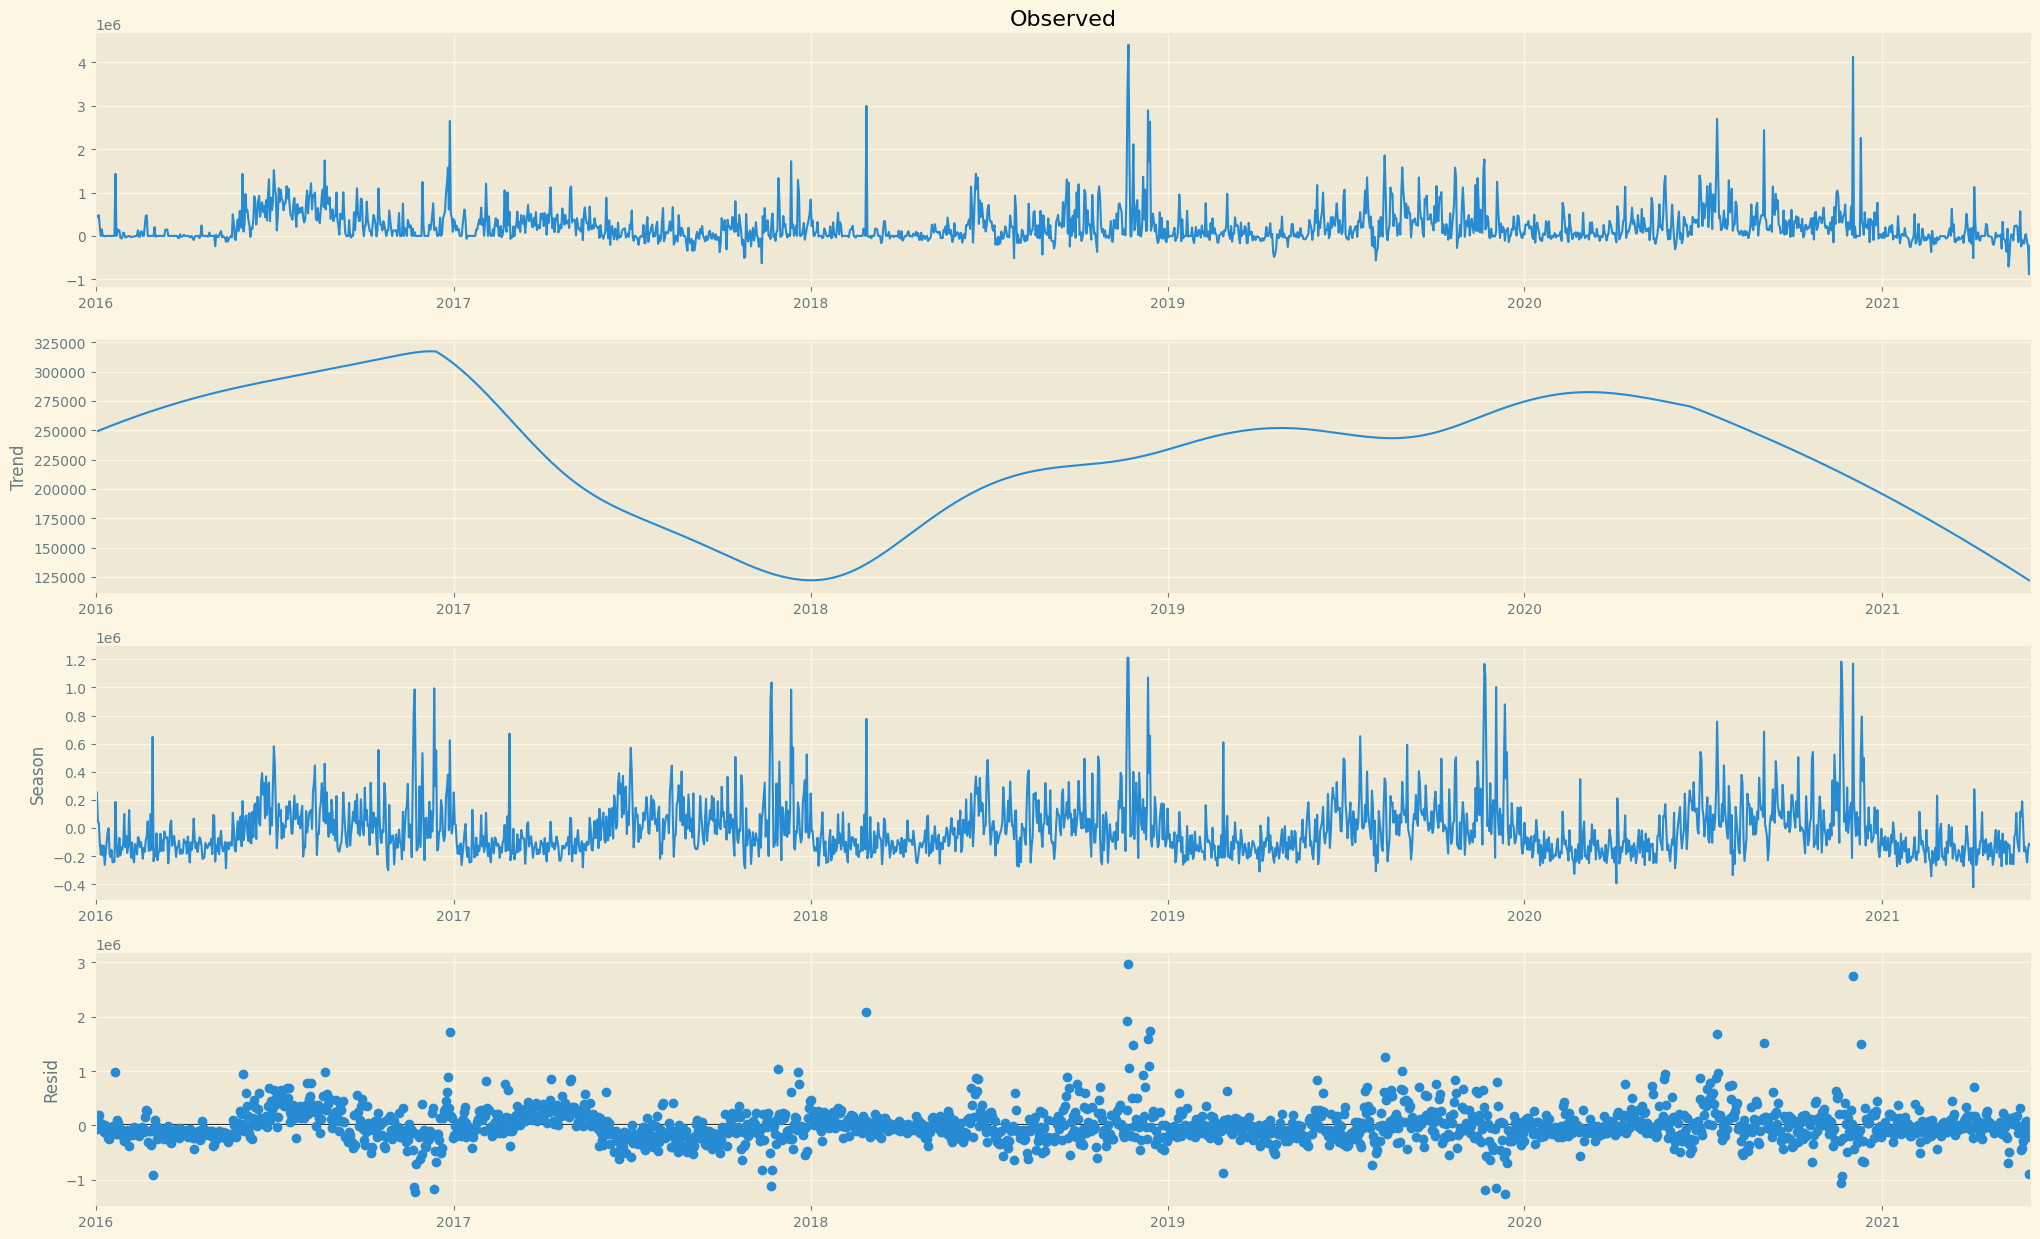

In [5]:

#* from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'

stlplot_sysD = STL(df_sys_D, period=365, seasonal_deg=0).fit()
stlplot_sysD.plot()

$\qquad$ Replotting with with plotly.graph_objects [go]

In [6]:

#? Necessary for plotting with plotly.graph_objects
stlplot_sysD.observed.reset_index(inplace=True)

In [7]:


layout = go.Layout(
margin=go.layout.Margin(
        l=20, #left margin
        r=15, #right margin
        b=15, #bottom margin
        t=35, #top margin
                        ), xaxis_title="Date", yaxis_title="Cost (£)",
                    )

fig = go.Figure(data=go.Scatter(x=stlplot_sysD.observed["End Time_D&T"], y=stlplot_sysD.observed["Cost"]), 
                layout=layout)
fig.update_layout(title="System Trades [Daily] -- Observed")
fig.show()
for i, t in zip([stlplot_sysD.trend, stlplot_sysD.seasonal, stlplot_sysD.resid],["Trend","Seasonal","Residuals"]):
    # title = f"System Trades [Daily] -- {t}"
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"System Trades [Daily] -- {t}")
    fig.show()
    
    
#! Unnecessary
#  font=dict(
#         family="Courier New, monospace",
#         # size=18,
#         color="RebeccaPurple"
#     )

$\qquad$ $\qquad$ Trying with Bokeh

In [ ]:
data, titles = [stlplot_sysD.trend, stlplot_sysD.seasonal, stlplot_sysD.resid], ["Trend","Seasonal","Residuals"]

for i,title in zip(data, titles):
    
    # p = figure()
    
    p = figure(title=title, x_axis_label='Date', y_axis_label='Cost',x_axis_type="datetime", plot_width=1500, plot_height=750, tools=[HoverTool()],
    tooltips="@x \n\n @y",
    sizing_mode="stretch_width")
    p.line(i.index, i.values, line_width=2)
    p.toolbar.autohide = True
    # legend_label="Temp."
    #? Config
    # p.legend.location = "top_left"
    # p.legend.title = "Obervations"
    
    show(p)

-------------------------

#### Resampling System Trade to Monthly frequency

In [10]:
df_sys_M = df_sys.set_index(['End Time_D&T'])[['Cost']].resample('M').sum()
# df_sys_M.head(4)


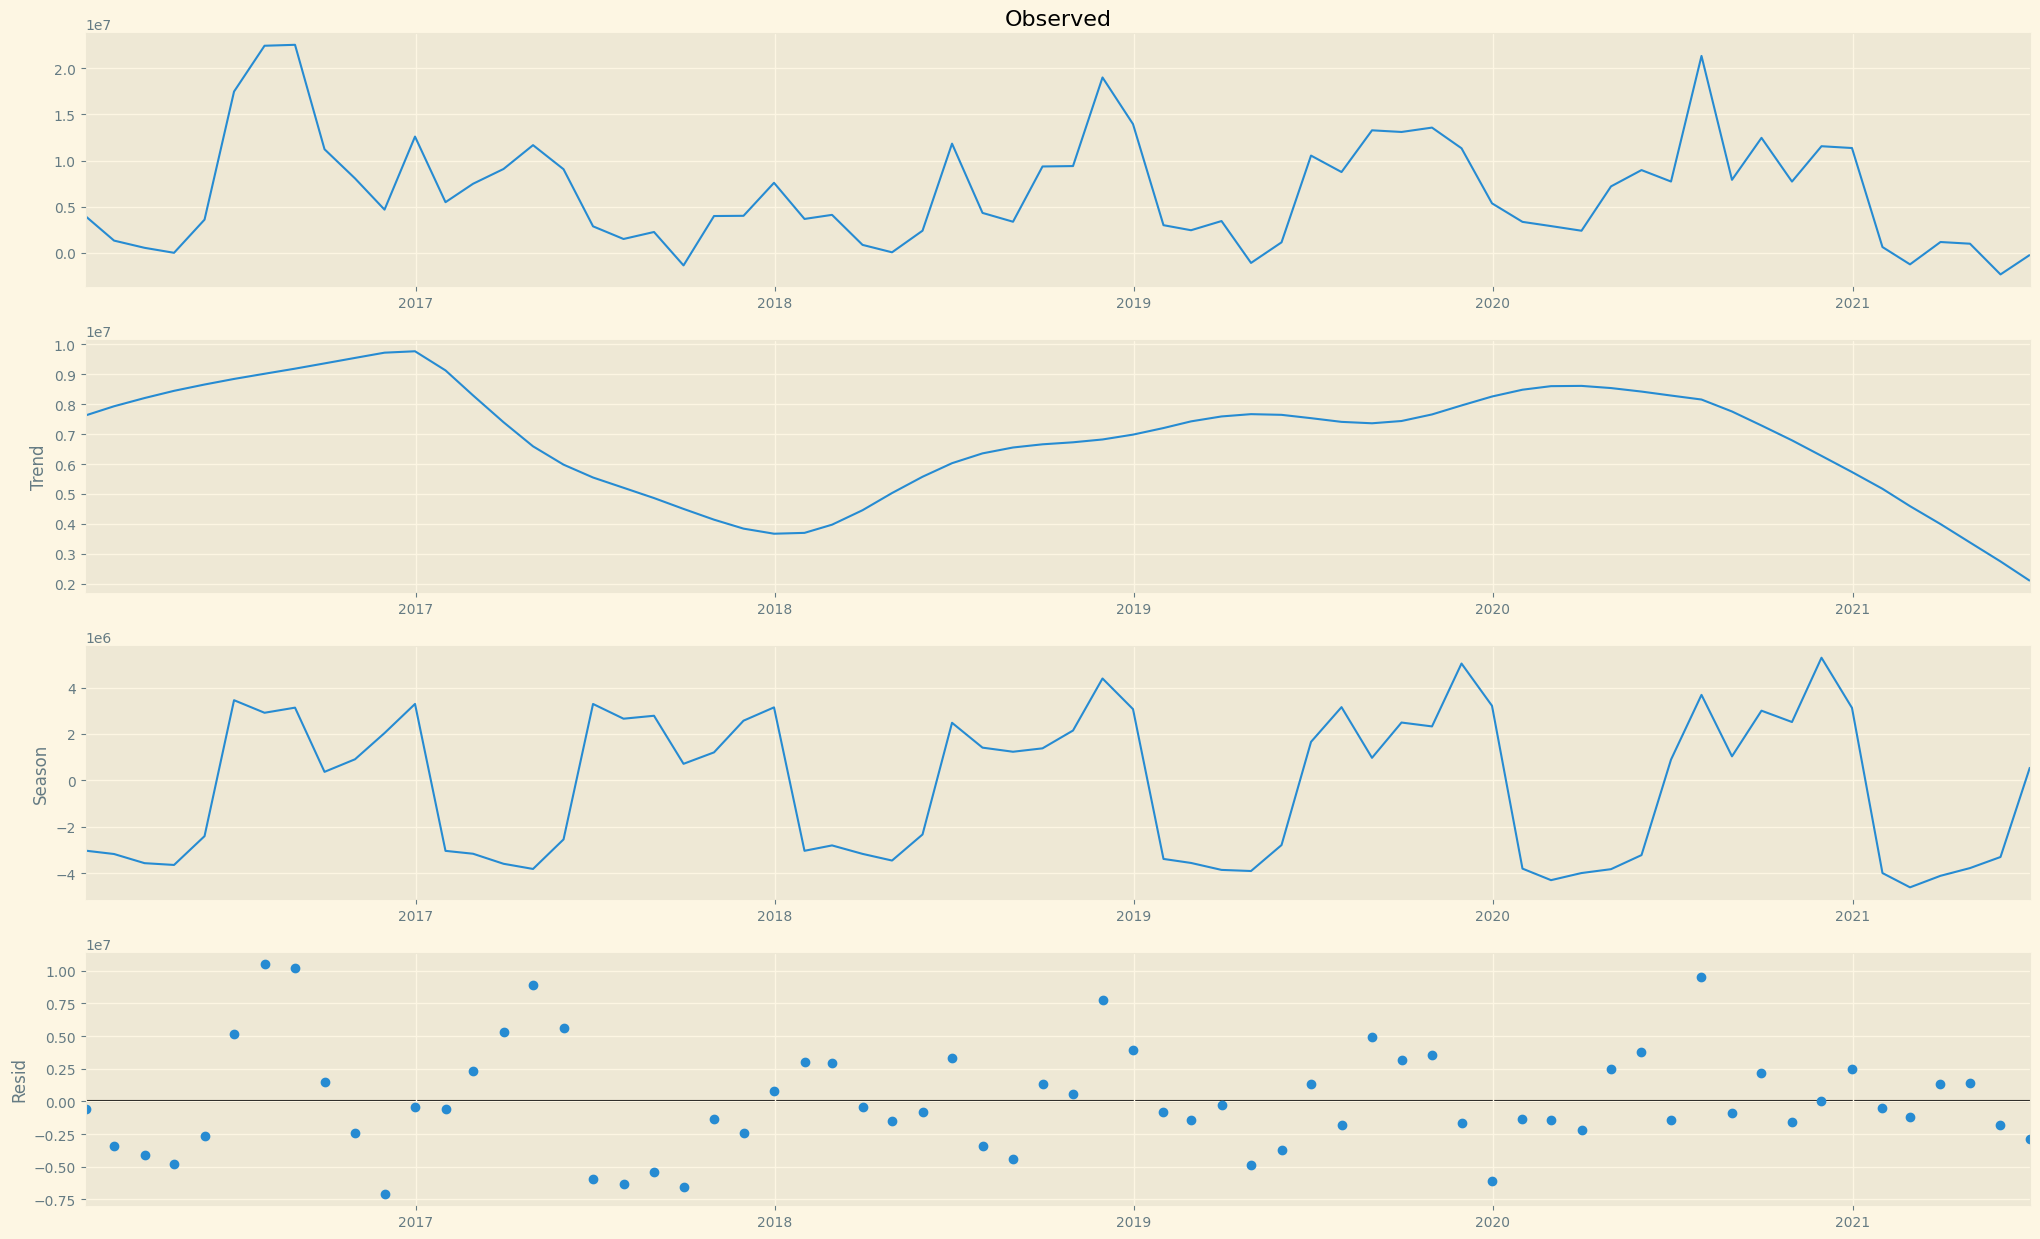

In [11]:
# df_enr_D.reset_index(inplace=True)

plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'
# ,,,seasonal_deg=1
stlplot_sysM = STL(df_sys_M,period=12, seasonal_deg=0).fit()
stlplot_sysM.plot()
# plt.show()

In [12]:
stlplot_sysM.observed.reset_index(inplace=True)

In [13]:

#? No need to re-execute the 'layout' cdoe from the top.

fig = go.Figure(data=go.Scatter(x=stlplot_sysM.observed["End Time_D&T"], y=stlplot_sysM.observed["Cost"]), layout=layout)
fig.update_layout(title="System Trades [Monthly] -- Observed")
fig.show()
for i,t in zip([stlplot_sysM.trend, stlplot_sysM.seasonal, stlplot_sysM.resid],["Trend","Seasonal","Residuals"]):
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"System Trades [Monthly] -- {t}")
    fig.show()

### 2. STL of Energy Trades

In [14]:

df_enr_D = df_enr.set_index(['End Time_D&T'])[['Cost']].resample('D').sum()

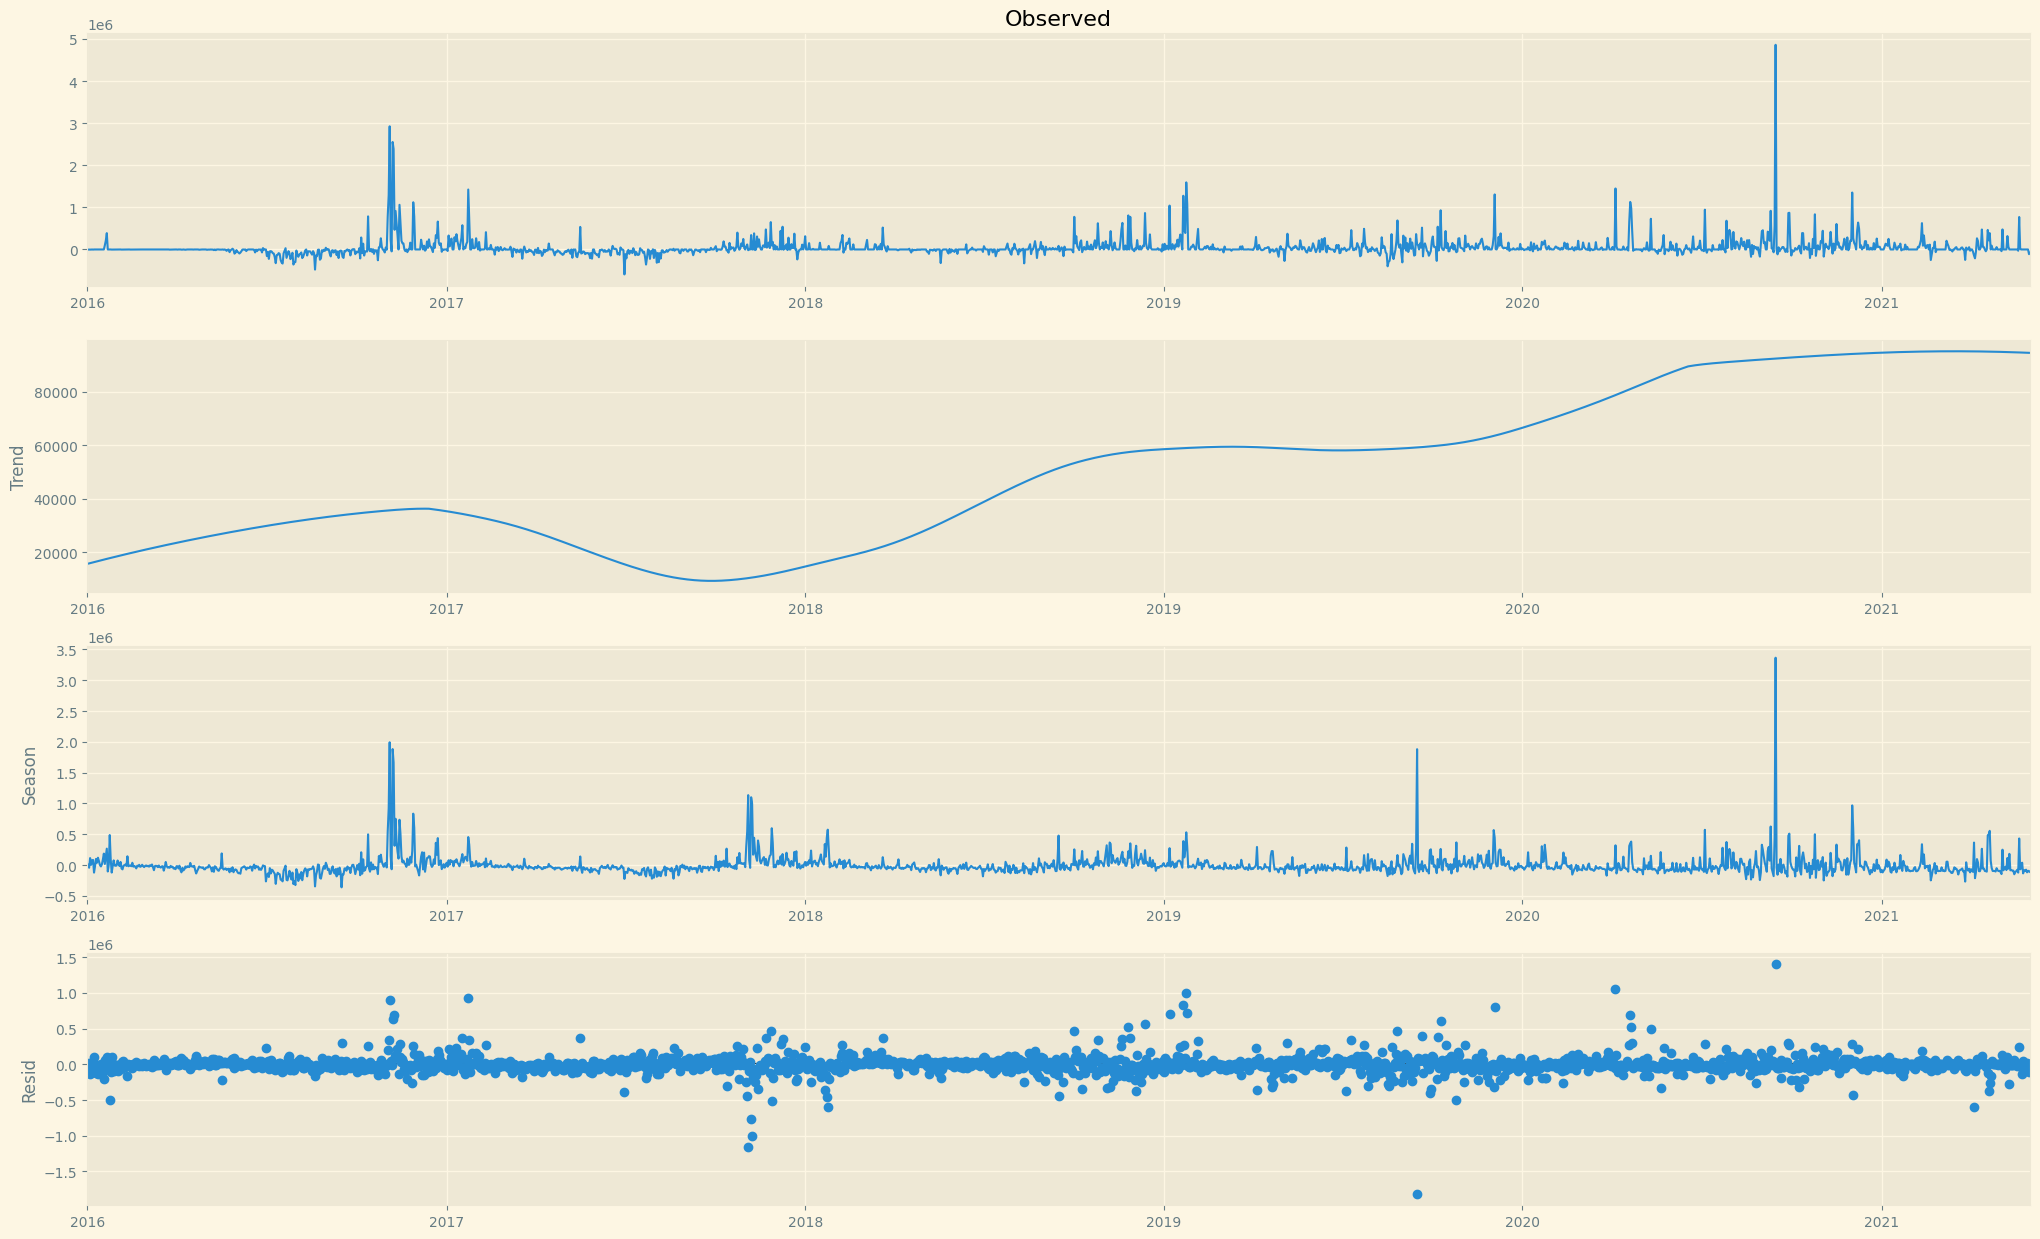

In [15]:
# df_enr_D.reset_index(inplace=True)

plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'
# ,,,seasonal_deg=1
stlplot_enrD = STL(df_enr_D,period=365, seasonal_deg=1).fit()
stlplot_enrD.plot()
# plt.show()

In [17]:
stlplot_enrD.observed.reset_index(inplace=True)

In [18]:
fig = go.Figure(data=go.Scatter(x=stlplot_enrD.observed["End Time_D&T"], y=stlplot_enrD.observed["Cost"]), 
                layout=layout)
fig.update_layout(title="Energy Trades [Daily] -- Observed")
fig.show()
for i, t in zip([stlplot_enrD.trend, stlplot_enrD.seasonal, stlplot_enrD.resid],["Trend","Seasonal","Residuals"]):
    # title = f"System Trades [Daily] -- {t}"
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"Energy Trades [Daily] -- {t}")
    fig.show()

#### Resampling Energy Trades to Monthly Frequency

In [4]:
df_enr_M = df_enr.set_index(['End Time_D&T'])[['Cost']].resample('M').sum()

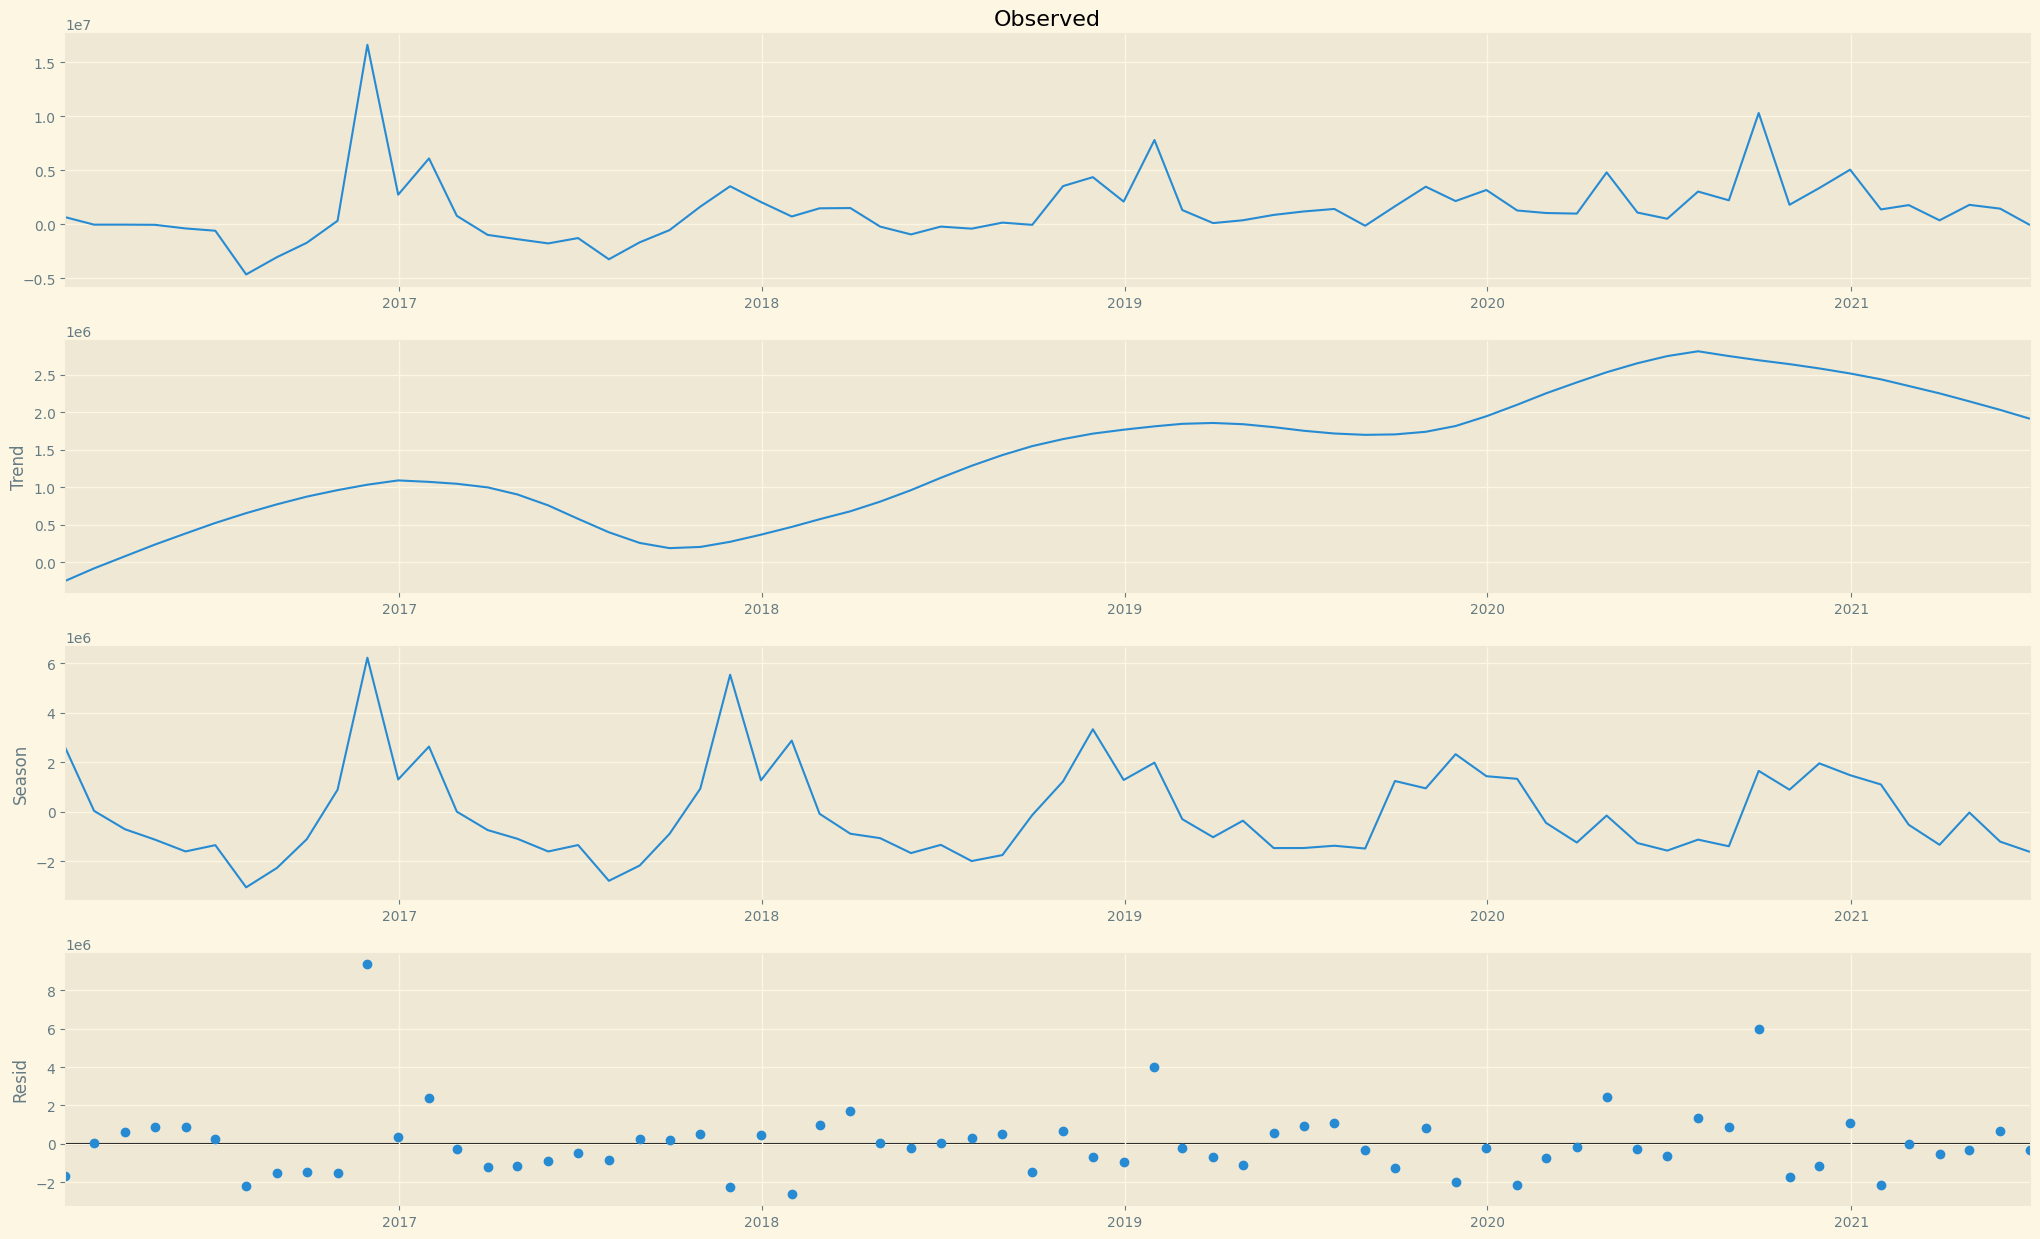

In [7]:
plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'

stlplot_enrD = STL(df_enr_M,period=12, seasonal_deg=0,).fit()
stlplot_enrD.plot()

Plotting Energy Trades [Monthly] in plotly.graph_objects 

In [23]:

#? Reformatting the .observed component, as neccessary
stlplot_enrD.observed.reset_index(inplace=True)

In [25]:
fig = go.Figure(data=go.Scatter(x=stlplot_enrD.observed["End Time_D&T"], y=stlplot_enrD.observed["Cost"]), 
                layout=layout)
fig.update_layout(title="Energy Trades [Daily] -- Observed")
fig.show()
for i, t in zip([stlplot_enrD.trend, stlplot_enrD.seasonal, stlplot_enrD.resid],["Trend","Seasonal","Residuals"]):
    # title = f"System Trades [Daily] -- {t}"
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"Energy Trades [Daily] -- {t}")
    fig.show()

### Trends Overlay

#### A.] Daily frequency

In [139]:

#? dictionary from the above series
trend_dict = {
    "System Trades -- Daily" : pd.Series(stlplot_sysD.trend.values[:], index=stlplot_sysD.trend.index),
    "Energy Trades -- Daily" : pd.Series(stlplot_enrD.trend.values[:], index=stlplot_sysD.trend.index)
            } 

trendplot_enr_sys = pd.DataFrame(trend_dict)
trendplot_enr_sys.reset_index(inplace=True)

# trendplot_enr_sys.head(6)

,System Trades -- Daily,Energy Trades -- Daily
End Time_D&T,,
2016-01-01,2.34694e+05,"15,583.0"
2016-01-02,2.35069e+05,"15,679.1"
2016-01-03,2.35443e+05,"15,775.0"
2016-01-04,2.35817e+05,"15,870.7"
2016-01-05,2.36189e+05,"15,966.2"
2016-01-06,2.36561e+05,"16,061.4"


,End Time_D&T,System Trades -- Daily,Energy Trades -- Daily
0,2016-01-01,2.34694e+05,"15,583.0"
1,2016-01-02,2.35069e+05,"15,679.1"
2,2016-01-03,2.35443e+05,"15,775.0"
3,2016-01-04,2.35817e+05,"15,870.7"
4,2016-01-05,2.36189e+05,"15,966.2"
5,2016-01-06,2.36561e+05,"16,061.4"


In [144]:
fig = go.Figure()
# name='lines'
fig.add_trace(go.Scatter(x=trendplot_enr_sys["End Time_D&T"], y=trendplot_enr_sys["System Trades -- Daily"],
                    mode='lines', name='Trend -- System Trades'
                    ))
fig.add_trace(go.Scatter(x=trendplot_enr_sys["End Time_D&T"], y=trendplot_enr_sys["Energy Trades -- Daily"],
                    mode='lines',
                    name='Trend -- Energy Trades'))

fig.show()


In [ ]:
dt_trend_enrsys = dt.show(trendplot_enr_sys, ignore_index=True)
dt_trend_enrsys

#### B.] Monthly frequency

### Residuals Analysis: Checking for Anomalies

In [52]:

#* Checking for Anomalies
sys_res_mu = stl_df3a.resid.mean()
sys_res_std = stl_df3a.resid.std()

lower = sys_res_mu - 3*sys_res_std
upper = sys_res_mu + 3*sys_res_std

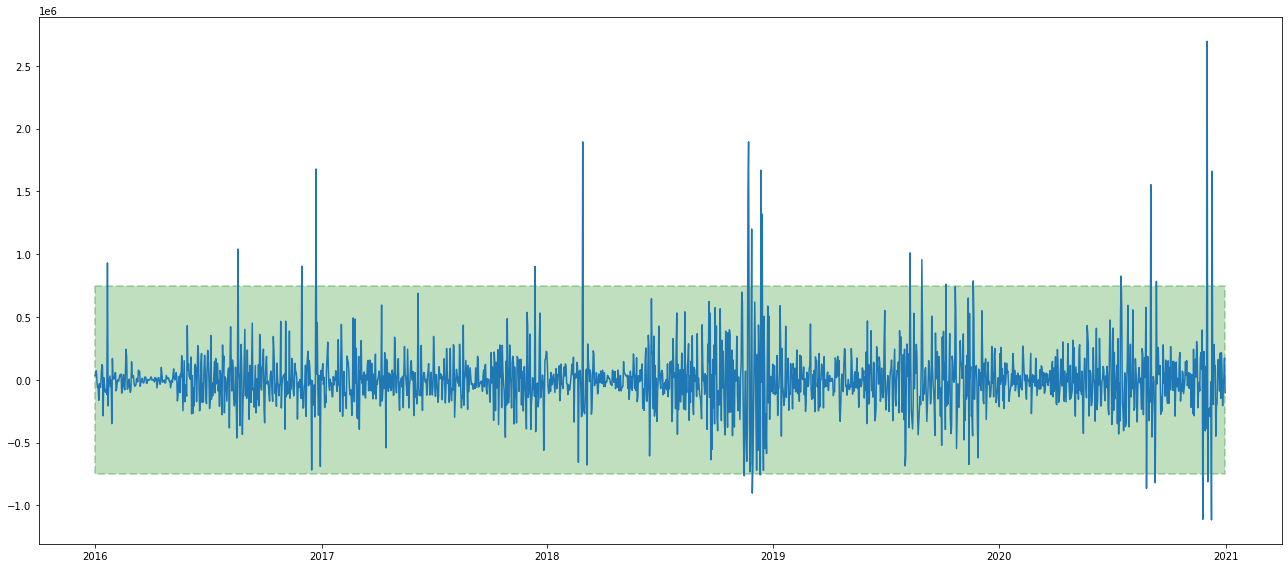

In [54]:
plt.figure(figsize=(18,8))
plt.plot(stl_df3a.resid)

plt.fill_between([datetime(2016,1,1), datetime(2020,12,31)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
# plt.xlim(datetime(2003,9,1), datetime(2020,12,1))


In [58]:

#Todo: Scatterplot above original, trends, seasonal. 
anomalies = df3a_d["Cost"][(stl_df3a.resid < lower) | (stl_df3a.resid > upper)]

### REJECTS

-------------------

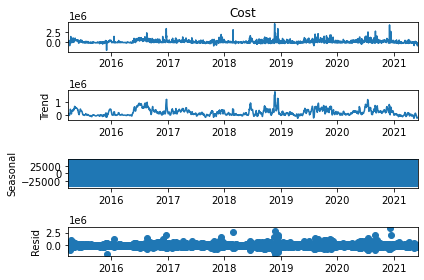

In [10]:


res_df3a = sm.tsa.seasonal_decompose(df3a["Cost"])
resplot_df3a = res_df3a.plot()

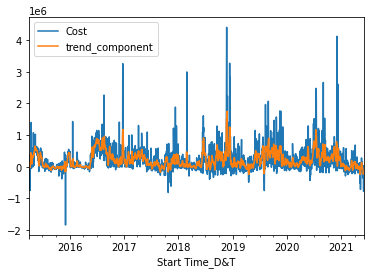

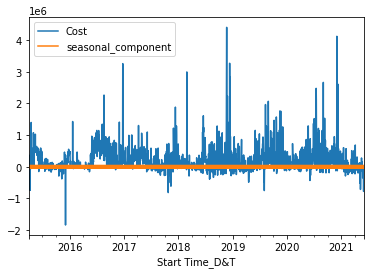

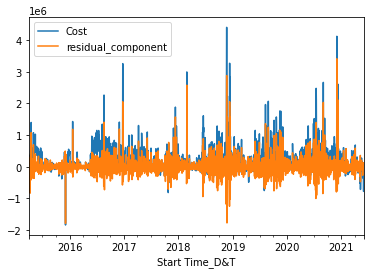

In [11]:
df3a['trend_component'] = res_df3a.trend
df3a['seasonal_component'] = res_df3a.seasonal
df3a['residual_component'] = res_df3a.resid

for N in ["trend","seasonal","residual"]:
    df3a[["Cost",(N + "_component")]].plot()

#### Cost with SO Flag (F)

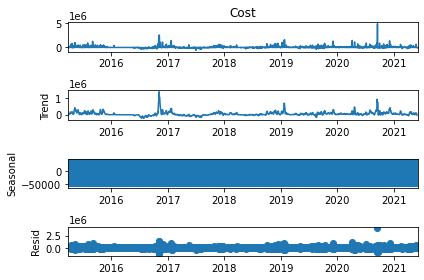

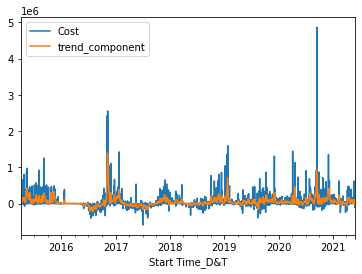

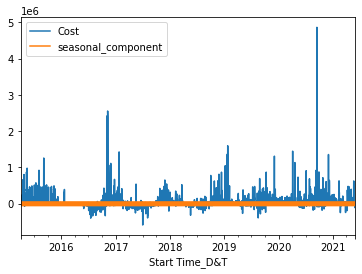

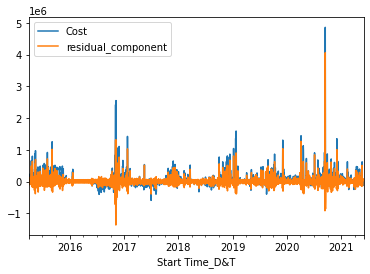

In [9]:
df4a = df[df["SO Flag"]== "F"]

#? Orig Code, without renaming
# df4 = df4[["Start Time_D&T","Volume","Cost"]]


df4a = df4a[["Start Time_D&T","Volume","Cost"]]
df4a = df4a.set_index("Start Time_D&T").resample('D').sum()

res_df4a = sm.tsa.seasonal_decompose(df4a["Cost"])
resplot_df4a = res_df4a.plot()

df4a['trend_component'] = res_df4a.trend
df4a['seasonal_component'] = res_df4a.seasonal
df4a['residual_component'] = res_df4a.resid

for N in ["trend","seasonal","residual"]:
    df4a[["Cost",(N + "_component")]].plot()

#### TSA Comparison of System Trade (T) vs Energy Trade (F) Cost

Compared to Forecasting, this TSA comparison is only static, in contrast to forecasting using TSA.

In [11]:
df3a.columns

Index(['Volume', 'Cost', 'trend_component', 'seasonal_component',
       'residual_component'],
      dtype='object')

In [ ]:

#! Erase if obsolete
dropcols = ["Price",'Trade Hours Duration', 'Start Hour']
df3a.drop(columns=dropcols, inplace=True)
df3a.columns

In [40]:
df4a.columns

Index(['Volume', 'Cost', 'trend_component', 'seasonal_component',
       'residual_component'],
      dtype='object')

In [12]:
# df_34tsa = ""
#! WRONG
# df_34tsa = df3a.join(df4a)
#! WRONG

df_34tsa = pd.merge(df3a,df4a, left_index=True, right_index=True)

df_34tsa.head(4)

,Volume_x,Cost_x,trend_component_x,seasonal_component_x,residual_component_x,Volume_y,Cost_y,trend_component_y,seasonal_component_y,residual_component_y
Start Time_D&T,,,,,,,,,,
2015-04-02,"1,533.0",1.30688e+05,NaN,"9,156.22",NaN,"1,700.0","82,832.0",NaN,"6,460.31",NaN
2015-04-03,543.0,1.17152e+05,NaN,"45,306.5",NaN,480.0,"24,000.0",NaN,"4,419.69",NaN
2015-04-04,-987.0,"92,518.6",NaN,"21,307.8",NaN,"2,400.0",1.18734e+05,"68,759.4","-59,816.9",1.09791e+05
2015-04-05,"3,351.0",3.59864e+05,1.17712e+05,"-26,817.7",2.6897e+05,0.0,0.0,"78,576.4","-46,523.4","-32,053.0"


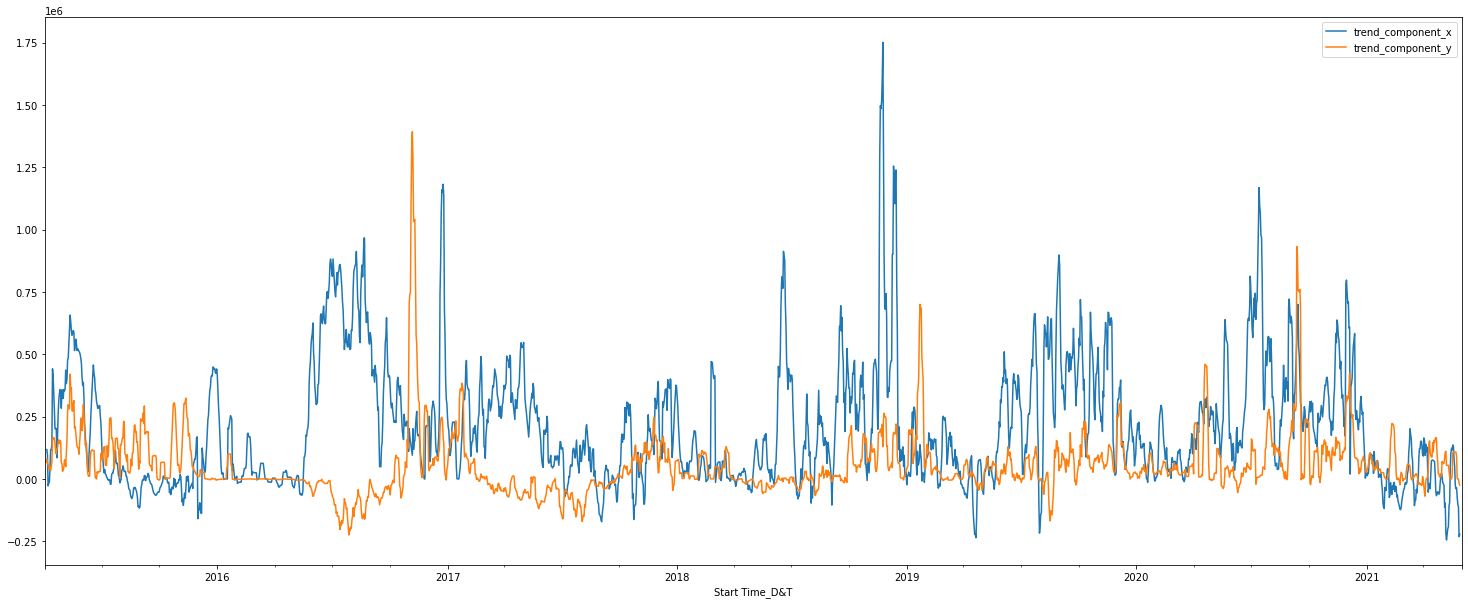

In [42]:

plt.rcParams["figure.figsize"]=[20.5,8.5]
plt.rcParams["figure.autolayout"]=True

#? Orig Code, Before combining into new DF
# df3a[["trend_component"]].plot(label="System Trade",legend=True)
# df4a[["trend_component"]].plot(secondary_y=True,label="Energy Trade",legend=True)

# df_34tsa[["trend_component_x"]].plot(label="Trend Components",legend=True)
# df_34tsa[["trend_component_y"]].plot(label="Trend Components",legend=True)

#? Done 
df_34tsa.reset_index(inplace=True)
# df_34tsa.columns
df_34tsa.plot(x="Start Time_D&T",y=["trend_component_x","trend_component_y"])
# df_34tsa.plot(x="Start Time_D&T",y=["trend_component_y"])

plt.show()

System Trade is more volatile; has more fluctuations. High std. dev'n, maybe? Next step: Transform Cost for Stationarity.

#### Filters from DTale

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.filters.bk_filter import bkfilter
from statsmodels.tsa.filters.cf_filter import cffilter

#* Hodrick-Prescott, Annual
s = df3.groupby('Start Time_D&T')['Cost'].sum()
cycle, trend = hpfilter(s, lamb=6.25)

#* Baxter-King, Annual
bk = df3.groupby('Start Time_D&T')['Cost'].sum()
cycle = bkfilter(s, 1.5, 8, 12)

#* Cristian-Fitzgerald, Annual
cf = df3.groupby('Start Time_D&T')['Cost'].sum()
cycle = cffilter(s, 1.5, 8, True)


### 2. Autocorrelation & PACF on Cost

MAY OMIT since more relevant on Forecasting with ML.

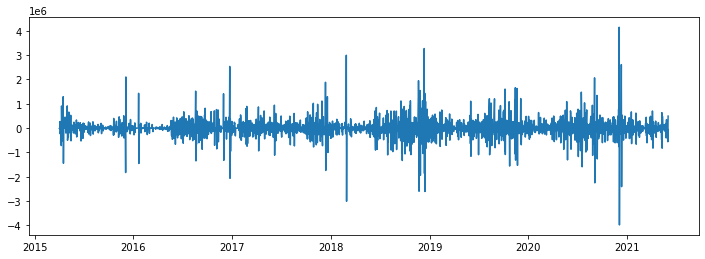

In [45]:

#? Testing for Stationarity of the plots
fig = plt.figure(figsize=(12,4))
plt.rcParams["figure.figsize"]=[20.5,8.5]

plt.plot(df3a["Cost"].interpolate().diff()[1:])

In [47]:

#* It becomes a pandas.Series object.
df3b = df3a["Cost"].interpolate().diff()[1:]
type(df3b)

pandas.core.series.Series

#### 2.A System Trades' Cost

<Figure size 864x288 with 0 Axes>

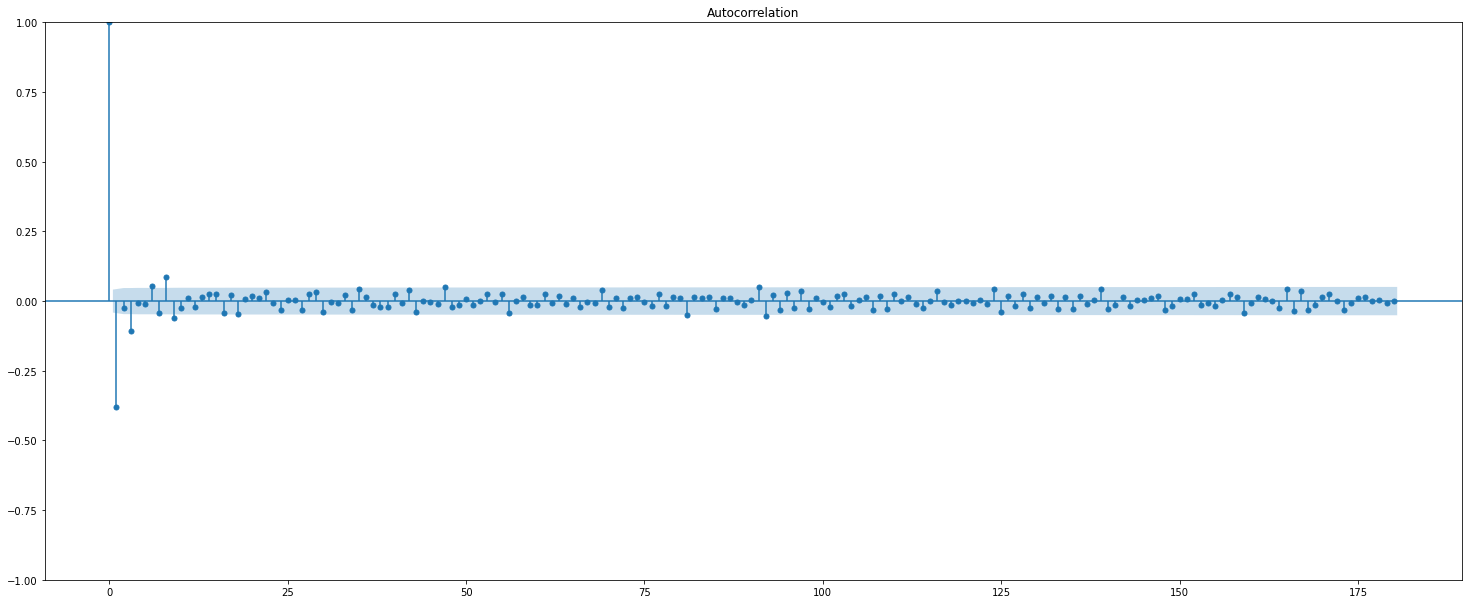

In [49]:
fig = plt.figure(figsize=(12,4))
plt.rcParams["figure.figsize"]=[20.5,8.5]
# ax = fig.add_subplot(1.23)

#? Fix axes or use plotly
#* 180 days lag
acf_df3a = plot_acf(df3a['Cost'].interpolate().diff()[1:], lags=180)
plt.tight_layout()

/home/fqp/anaconda3/envs/s1_v3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

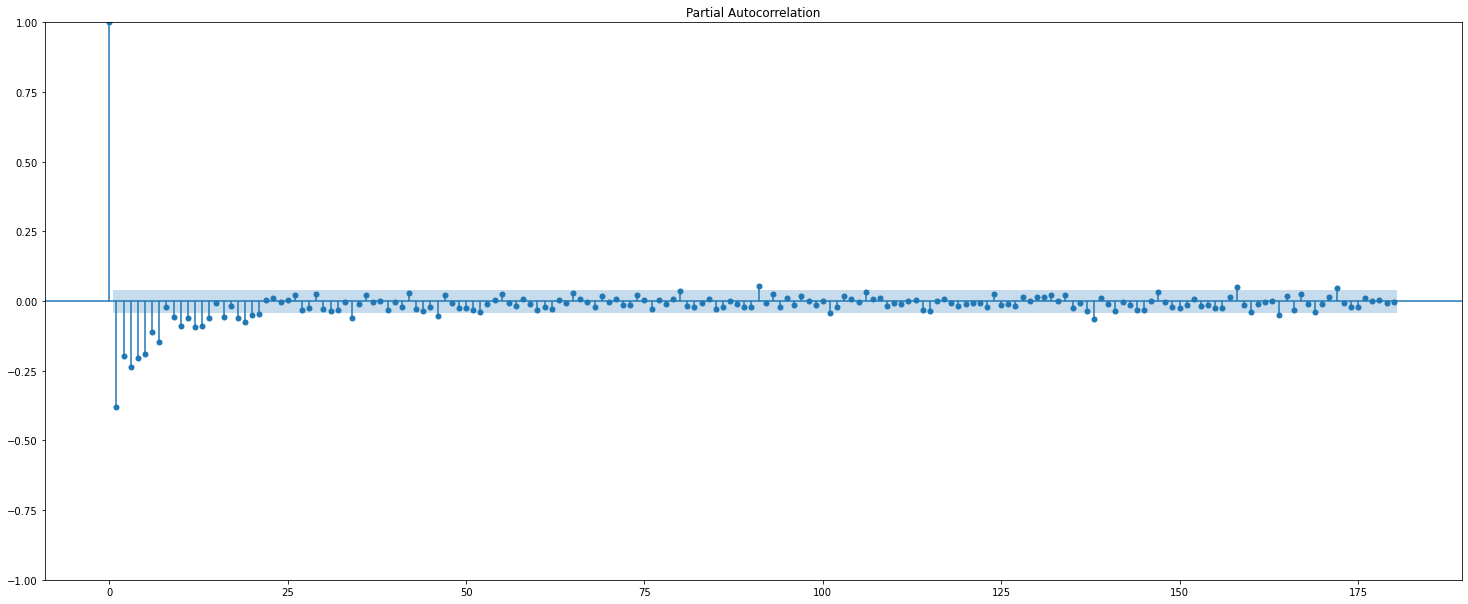

In [39]:
fig = plt.figure(figsize=(12,4))
plt.rcParams["figure.figsize"]=[20.5,8.5]
# ax = fig.add_subplot(1.23)

#? Fix axes or use plotly
#* 180 days lag
pacf_df3a = plot_pacf(df3a['Cost'].interpolate().diff()[1:], lags=180)
plt.tight_layout()

#### 2.B Energy Trades' Cost

<Figure size 864x288 with 0 Axes>

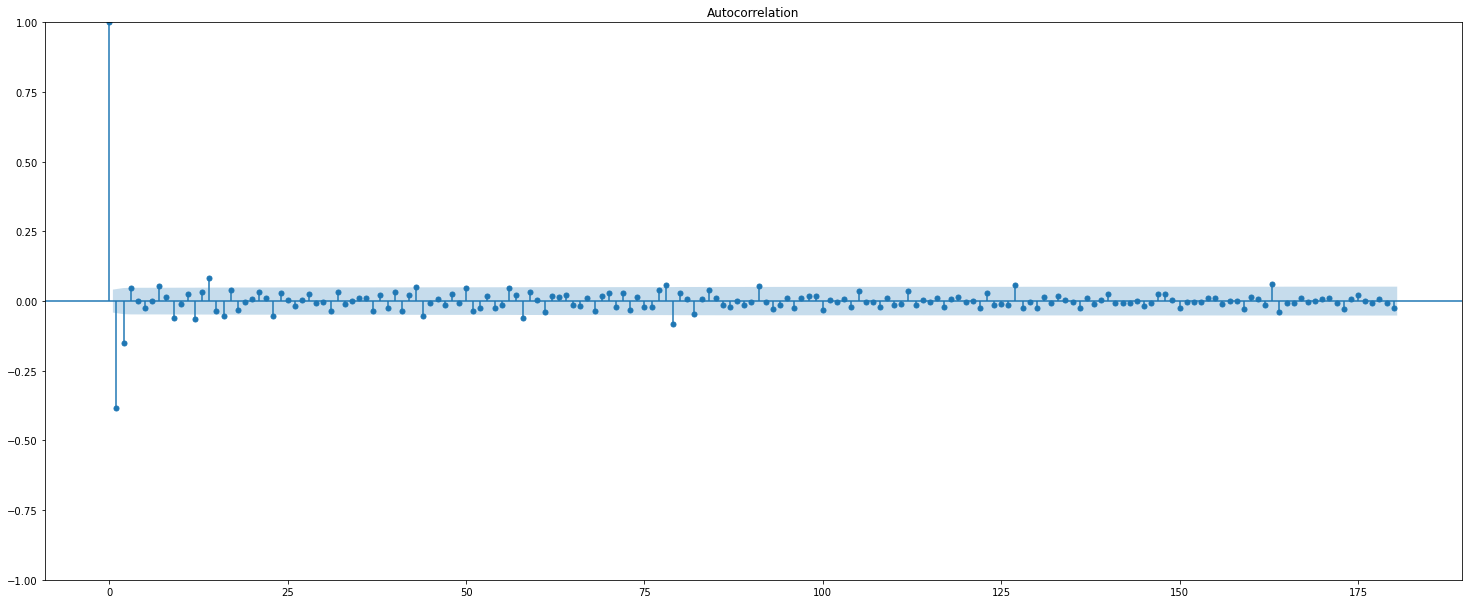

In [40]:
fig = plt.figure(figsize=(12,4))
plt.rcParams["figure.figsize"]=[20.5,8.5]
# ax = fig.add_subplot(1.23)

#? Fix axes or use plotly
#* 180 days lag
acf_df4a = plot_acf(df4a['Cost'].interpolate().diff()[1:], lags=180)
plt.tight_layout()

/home/fqp/anaconda3/envs/s1_v3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

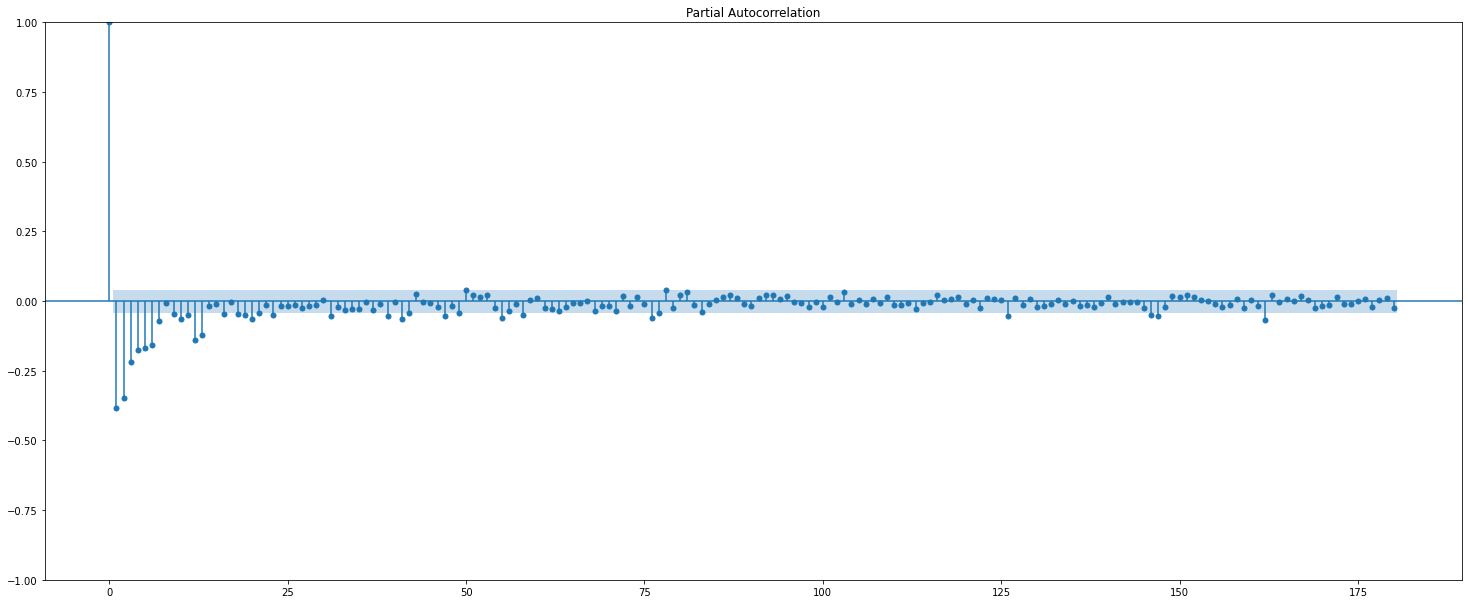

In [41]:
fig = plt.figure(figsize=(12,4))
plt.rcParams["figure.figsize"]=[20.5,8.5]
# ax = fig.add_subplot(1.23)

#? Fix axes or use plotly
#* 180 days lag
pacf_df4a = plot_pacf(df4a['Cost'].interpolate().diff()[1:], lags=180)
plt.tight_layout()

### Dumping the Data

In [42]:

#* To be used by the next notebook
joblib.dump(df3a,"/home/fqp/Documents/0 Study/3 Projects/s5_SQL_Flask_RapidsAI/data_prio/GTMA_System Trades Cost_df3A")
joblib.dump(df4a,"/home/fqp/Documents/0 Study/3 Projects/s5_SQL_Flask_RapidsAI/data_prio/GTMA_Energy Trades Cost_df4A")

['/home/fqp/Documents/0 Study/3 Projects/s5_SQL_Flask_RapidsAI/data_prio/GTMA_Energy Trades Cost_df4A']

## BELOW: FOR DELETION

### 3 Timeseries Forecasting

#### Error Metrics

In [58]:

#? y_pred == y_forecasted
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

Question: One approach is to forecast purely on Energy / System Trade, regardless if the cost is +/-

This will help the company to forecast expenditures / income.

#### Setting Train-Test dfs

In [82]:


#? DateTime Index, NOT as Column
df_3train = df3a['2018-06-01':'2020-12-31']
df_3test = df3a['2021-01-01':'2021-06-01']

#* Forecast range
#* ['2021-01-01':'2021-06-01']

#? Reference
# test_df = data['2021-10-01':'2021-11-30']

In [83]:
df_4train = df4a['2018-06-01':'2020-12-31']
df_4test = df4a['2021-01-01':'2021-06-01']

In [73]:
df_4test.columns

Index(['Volume', 'Cost', 'trend_component', 'seasonal_component',
       'residual_component'],
      dtype='object')

#### 3.A Naive

In [ ]:
forecast_df = data.shift(1)['2021-10-01':'2021-11-30']

#? pd.shift(n) --> Shifts the data n units to the right
#? where n is dependent on resample("D") or ("H")

May run Naive n-day forecasting OR specify a date, then check value exactly [30, 60, 365 ...]

#### 3.B Windowed Average Approach

In [77]:
forecasted_df

Start Time_D&T
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2021-05-28   -36,026.3
2021-05-29   -38,559.7
2021-05-30   -42,300.9
2021-05-31   -49,196.7
2021-06-01   -78,121.5
Freq: D, Name: Cost, Length: 152, dtype: float64

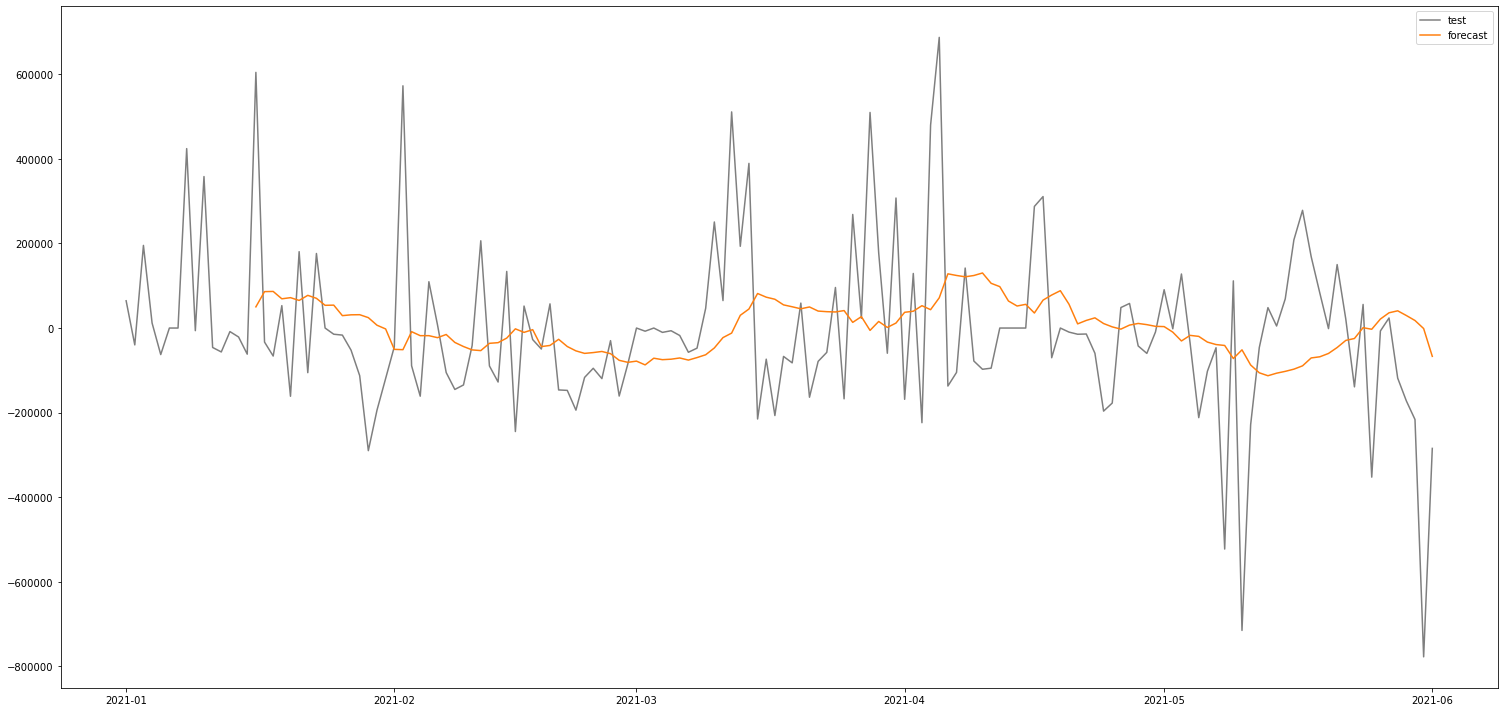

In [112]:

#* Next Day Forecasting
forecasted_df = df_3test.rolling(15).mean().shift(1)["Cost"]

#? Plotting the forecast
fig = plt.figure(figsize=(21,10))
# plt.plot(df_3train['Cost'], color='C0', label='train')
plt.plot(df_3test['Cost'], color='C7', label='test')
plt.plot(forecasted_df, color='C1', label='forecast')
plt.tight_layout()
plt.legend()
# plt.ylabel("Streams x 100K")

The above code:
Next day forecasting based on 30-day moving average.

In [119]:

#! Need to double-check
forecasted_df.fillna(0,inplace=True)
# forecasted_df.head(12)

show_errors(df_3test['Cost'],forecasted_df)

/tmp/ipykernel_961/1679760576.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/tmp/ipykernel_961/1679760576.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


,RMSE,MAE,MAPE
0,2.05363e+05,1.47351e+05,NaN


FIX the error function. Error values seems problematic.

#### 3.C Exponential Window Method

In [ ]:

#? Reference
forecast_df = data.ewm(alpha=0.7).mean().shift(1)['2021-10-01':'2021-11-30']

#! Double-check if need to rolling().mean() ; accdg to class notes

In [ ]:
## Plot then Error

#### 3.D TSA Forecasting

In [ ]:

#? Must split df3 into test-train before Forecasting analysis!!!

In [ ]:
# Specify fit for weekly (d=7) seasonal cycles
# Assume additive combinations of component

model_fit = ExponentialSmoothing(train_df['streams'],seasonal_periods=7 ,trend='add', seasonal='add').fit()
forecast_df = pd.DataFrame(model_fit.forecast(len(test_df)).values, index=test_df.index, columns=['streams'])

model_fit = ExponentialSmoothing(df3['Cost'], seasonal_periods=7, trend='add', seasonal='add').fit()
forecast_df = pd.DataFrame(,index=df3, columns=['Cost'])
